In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib
matplotlib.style.use('seaborn')

In [18]:
def read(file_name): 
    df = pd.read_excel(file_name, sheet_name = sheet_name)
    df.head()
    df = df.rename(columns={SOURCE: 'source', TARGET: 'target', LINK_WEIGHT : 'weight', DIRECTION : 'direction'})
    if project:
        return df[['source', 'target', 'weight', 'direction']]
    return df

In [19]:
df = pd.read_excel("Final_states.xlsx", index_col=0)

In [20]:
df

,EE_EE,EM_I0M1,EM_MM,EM_M2M,EM_M3M,EM_I1M,MM_MM,ME_MI1,ME_M1I0,ME_MM,ME_MM2,ME_MM3
AKT_1,False,False,True,False,False,False,True,True,True,True,True,True
AKT_2,False,True,True,True,True,True,True,False,False,True,False,False
AXIN1_1,True,False,False,False,False,False,False,False,False,False,False,False
AXIN1_2,True,False,False,False,False,False,False,False,False,False,False,False
AXIN2_1,False,False,True,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
dist_from_M_cell_1,99,55,0,30,39,47,0,0,3,0,0,0
node_diff_from_E_cell_2,NaN,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,AXIN1\nBTrCP\nBcatenin_memb\nBcatenin_nuc\nCD4...,AXIN1\nBTrCP\nBcatenin_memb\nBcatenin_nuc\nCD4...,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,AXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcatenin_n...,AXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcatenin_n...
dist_from_E_cell_2,0,96,99,99,99,99,99,54,46,99,71,62
node_diff_from_M_cell_2,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,Csl\nNOTCH\nNOTCH_ic,NaN,NaN,NaN,NaN,NaN,AKT\nAXIN2\nCDC42\nCHD1L\nDELTA_jux\nDNMT3\nEG...,AKT\nAXIN2\nCDC42\nCHD1L\nDELTA_jux\nDNMT3\nEG...,NaN,AKT\nCDC42\nCHD1L\nDest_compl\nESRP\nFGF_ex\nG...,AKT\nCDC42\nCHD1L\nDNMT3\nDest_compl\nEGFR\nER...


In [34]:
final_states_df = df.transpose()

In [22]:
final_states_df

,AKT_1,AKT_2,AXIN1_1,AXIN1_2,AXIN2_1,AXIN2_2,BTrCP_1,BTrCP_2,Bcatenin_memb_1,Bcatenin_memb_2,...,max steps,average steps,node_diff_from_E_cell_1,dist_from_E_cell_1,node_diff_from_M_cell_1,dist_from_M_cell_1,node_diff_from_E_cell_2,dist_from_E_cell_2,node_diff_from_M_cell_2,dist_from_M_cell_2
EE_EE,False,False,True,True,False,False,True,True,True,True,...,0,0,NaN,0,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99
EM_I0M1,False,True,False,False,False,True,False,False,False,False,...,8440,4124.85,AXIN1\nBTrCP\nBcatenin_memb\nBcatenin_nuc\nCD4...,46,AKT\nAXIN2\nCDC42\nCHD1L\nDELTA_jux\nDNMT3\nEG...,55,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,96,Csl\nNOTCH\nNOTCH_ic,3
EM_MM,True,True,False,False,True,True,False,False,False,False,...,11051,6927.33,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0
EM_M2M,False,True,False,False,True,True,False,False,False,False,...,15328,8160.21,AXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcatenin_n...,71,AKT\nCDC42\nCHD1L\nDest_compl\nESRP\nFGF_ex\nG...,30,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0
EM_M3M,False,True,False,False,True,True,False,False,False,False,...,9232,6301.7,AXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcatenin_n...,62,AKT\nCDC42\nCHD1L\nDNMT3\nDest_compl\nEGFR\nER...,39,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0
EM_I1M,False,True,False,False,False,True,False,False,False,False,...,9733,7276.5,AXIN1\nBTrCP\nBcatenin_memb\nBcatenin_nuc\nCD4...,54,AKT\nAXIN2\nCDC42\nCHD1L\nDELTA_jux\nDNMT3\nEG...,47,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0
MM_MM,True,True,False,False,True,True,False,False,False,False,...,0,0,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0
ME_MI1,True,False,False,False,True,False,False,False,False,False,...,6026,5573.5,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0,AXIN1\nBTrCP\nBcatenin_memb\nBcatenin_nuc\nCD4...,54,AKT\nAXIN2\nCDC42\nCHD1L\nDELTA_jux\nDNMT3\nEG...,47
ME_M1I0,True,False,False,False,True,False,False,False,False,False,...,7965,4166.4,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,96,Csl\nNOTCH\nNOTCH_ic,3,AXIN1\nBTrCP\nBcatenin_memb\nBcatenin_nuc\nCD4...,46,AKT\nAXIN2\nCDC42\nCHD1L\nDELTA_jux\nDNMT3\nEG...,55
ME_MM,True,True,False,False,True,True,False,False,False,False,...,13425,6986.17,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0,AKT\nAXIN1\nAXIN2\nBTrCP\nBcatenin_memb\nBcate...,99,NaN,0


In [23]:
states = final_states_df.index.to_numpy()

In [24]:
columns = final_states_df.columns

In [25]:
states

array(['EE_EE', 'EM_I0M1', 'EM_MM', 'EM_M2M', 'EM_M3M', 'EM_I1M', 'MM_MM',
       'ME_MI1', 'ME_M1I0', 'ME_MM', 'ME_MM2', 'ME_MM3'], dtype=object)

In [39]:
initial_states = []
attractors = []
for i in states:
    tomb = i.split('_')
    init = tomb[0]
    final = tomb[len(tomb)-1]
    initial_states.append(init)
    attractors.append(final)

In [40]:
initial_states

['EE', 'EM', 'EM', 'EM', 'EM', 'EM', 'MM', 'ME', 'ME', 'ME', 'ME', 'ME']

In [41]:
attractors

['EE',
 'I0M1',
 'MM',
 'M2M',
 'M3M',
 'I1M',
 'MM',
 'MI1',
 'M1I0',
 'MM',
 'MM2',
 'MM3']

In [157]:

final_states = []
for a in attractors:
    state = ""
    for i in a:
       if not i.isdigit():
        state = state + i
    final_states.append(state)

In [158]:
final_states

['EE', 'IM', 'MM', 'MM', 'MM', 'IM', 'MM', 'MI', 'MI', 'MM', 'MM', 'MM']

In [45]:
final_states_df.insert(0, 'initial_state', initial_states)
final_states_df.insert(0, 'final_state', final_states)
final_states_df.insert(0, 'attractors', attractors)

In [46]:
final_states_df[['initial_state', 'final_state', 'count']]

,initial_state,final_state,count
EE_EE,EE,EE,500
EM_I0M1,EM,IM,261
EM_MM,EM,MM,184
EM_M2M,EM,MM,43
EM_M3M,EM,MM,10
EM_I1M,EM,IM,2
MM_MM,MM,MM,500
ME_MI1,ME,MI,2
ME_M1I0,ME,MI,236
ME_MM,ME,MM,201


In [159]:
df2=pd.DataFrame(final_states_df.groupby(['initial_state', 'final_state'])['count'].sum())
df3=df2.reset_index()

In [160]:
df3[['final_state', 'count']].transpose()

,0,1,2,3,4,5
final_state,EE,IM,MM,MI,MM,MM
count,500,263,237,238,262,500


In [161]:
df3 = pd.DataFrame(final_states_df.groupby(['initial_state', 'attractors'])['count'].sum())

In [74]:
'EE' in df2.loc['EE'].index

True

In [115]:
init = df3.initial_state.unique()
final = df3.final_state.unique()

matrix = [{fin: df2.loc[init_s, fin][0] if fin in df2.loc[init_s].index else 0 for fin in final} for init_s in init]

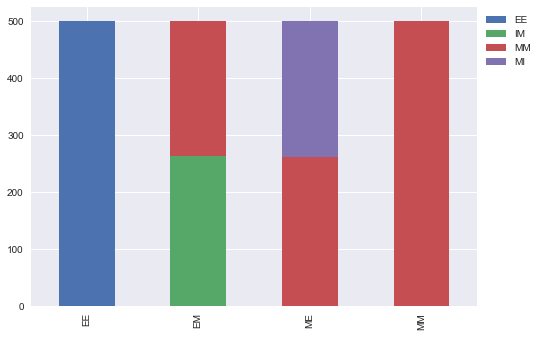

In [146]:
pd.DataFrame(matrix, index=init).plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

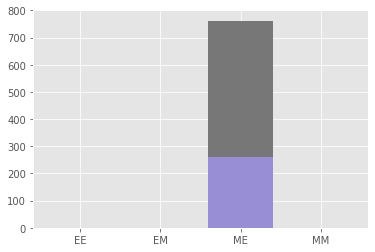

In [108]:
ind = np.arange(len(init))
for i in range(0, len(matrix)):
    if i == 0:
        plt.bar(ind, initial)
    else:
        plt.bar(ind, initial, bottom=matrix[i-1])
plt.xticks(ind, init)
plt.show()

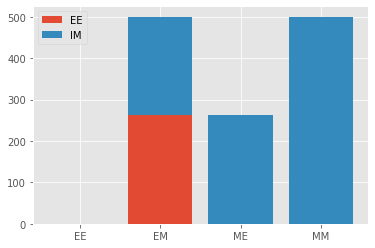

In [105]:
plt.bar(ind, matrix[1])
plt.bar(ind, matrix[2], bottom=matrix[1])
plt.xticks(ind, init)
plt.legend(final)
plt.show()

<BarContainer object of 6 artists>

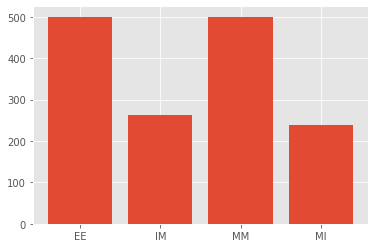

In [128]:
initial = df2.initial_state.unique()
final_state_types = df2.final_state.unique()
ind = np.arange(len(initial))
plt.bar(df2['final_state'], df2['count'])

In [127]:
df2['count']

0    500
1    263
2    237
3    238
4    262
5    500
Name: count, dtype: int64